In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\admin\Desktop\netflix_titles_nov_2019.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      3936 non-null   object        
 3   cast          5281 non-null   object        
 4   country       5410 non-null   object        
 5   date_added    5195 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5827 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 547.3+ KB


In [6]:
df['date_added']=pd.to_datetime(df['date_added'])

In [9]:
df['year_added']=df['date_added'].dt.year

In [11]:
df['month_added']=df['date_added'].dt.month

In [15]:
df.iloc[0]['duration'].split(" ")[0]

'1'

In [17]:
df.loc[df['type']!='Movie','season_count']=df.loc[df['type']!='Movie']['duration'].apply(lambda x: x.split(" ")[0])

In [23]:
df['season_count']=df.apply(lambda x:x['duration'].split(" ")[0] if "Season" in x['duration'] else "",axis=1)

In [26]:
df['duration']=df.apply(lambda x:x['duration'].split(" ")[0] if 'min' in x['duration'] else '',axis=1)

<Axes: ylabel='proportion'>

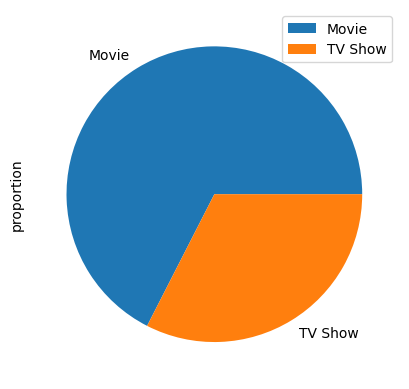

In [51]:
df['type'].value_counts(normalize=True).plot(kind='pie',x='type',y='count',legend='type')

How was the growth over years?

In [48]:
d1=df.groupby(['year_added','type']).size().reset_index(name='count').sort_values(by='year_added')

In [50]:
d1

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,4
6,2012.0,TV Show,3
7,2013.0,Movie,6
8,2013.0,TV Show,3
9,2014.0,Movie,19


<Axes: xlabel='year_added', ylabel='count'>

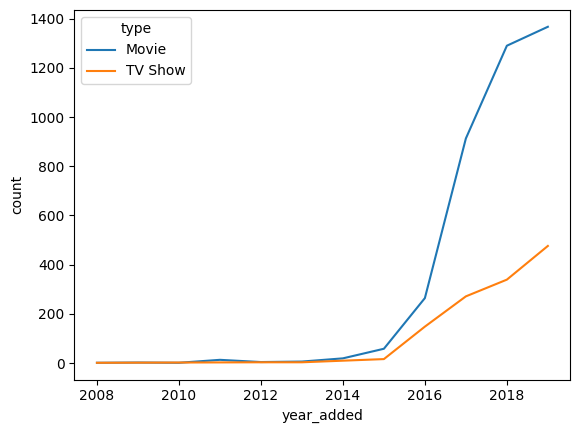

In [49]:
sns.lineplot(d1,x='year_added',y='count',hue='type')

In [52]:
df['month_added'].value_counts()

month_added
10.0    580
11.0    544
3.0     504
8.0     454
12.0    424
9.0     420
7.0     413
4.0     406
1.0     389
5.0     380
2.0     342
6.0     339
Name: count, dtype: int64

In [54]:
df['release_year'].value_counts(normalize=True).head(10)

release_year
2018    0.178174
2017    0.158986
2016    0.140140
2019    0.130547
2015    0.086003
2014    0.048141
2013    0.039746
2012    0.029810
2010    0.023471
2011    0.021758
Name: proportion, dtype: float64

In [60]:
df.query('type=="Movie"')['release_year'].idxmin()

4929

In [62]:
if 4929 in df.query('type=="Movie"').index:
    print('h')

h


In [70]:
df.sort_values(by='release_year').query('type=="TV Show"')[['title','release_year']].head(10)

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
5143,Pioneers of African-American Cinema,1946
4593,The Twilight Zone (Original Series),1963
4589,The Andy Griffith Show,1967
4266,Star Trek,1968
2623,Monty Python's Fliegender Zirkus,1972
2624,Monty Python's Flying Circus,1974
3503,Dad's Army,1977
3921,El Chavo,1979
2182,Ninja Hattori,1981


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,2010.0,11.0,
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,2009.0,11.0,
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,2009.0,5.0,
5835,70157452,Dinner for Five,NaN,NaN,United States,2008-02-04,2007,TV-MA,,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,2008.0,2.0,1


In [72]:
df['country'].value_counts()

country
United States                                           1907
India                                                    697
United Kingdom                                           336
Japan                                                    168
Canada                                                   139
                                                        ... 
Norway, Denmark, Netherlands, Sweden                       1
Ireland, United Kingdom, Greece, France, Netherlands       1
Israel, Germany                                            1
Canada, Germany, France, United States                     1
Spain, Mexico, France                                      1
Name: count, Length: 527, dtype: int64

In [79]:
df.loc[df['type']=="Movie",'duration']=df.loc[df['type']=="Movie"]['duration'].astype(float)

<Axes: xlabel='season_count', ylabel='Count'>

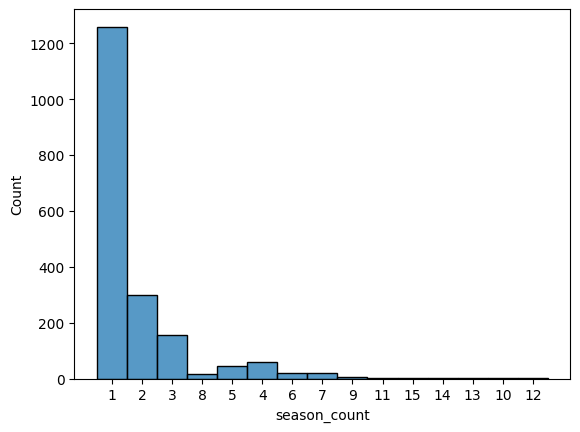

In [87]:
sns.histplot(df.query('type=="TV Show"')['season_count'])

In [93]:
df['listed_in']=df['listed_in'].apply(lambda x:x.split(', '))

In [96]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"[International TV Shows, Korean TV Shows, Roma...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67.0,"[Documentaries, International Movies]","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135.0,"[Comedies, Dramas, International Movies]",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106.0,"[Dramas, Independent Movies, International Mov...","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,[Kids' TV],"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84.0,"[Cult Movies, Horror Movies]","This collection cherry-picks trailers, forgott...",Movie,2010.0,11.0,
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29.0,[Horror Movies],"After committing suicide, a washed-up rocker r...",Movie,2009.0,11.0,
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104.0,"[Dramas, International Movies]",When he causes a car accident that leaves a yo...,Movie,2009.0,5.0,
5835,70157452,Dinner for Five,NaN,NaN,United States,2008-02-04,2007,TV-MA,,[Stand-Up Comedy & Talk Shows],"In each episode, four celebrities join host Jo...",TV Show,2008.0,2.0,1


In [97]:
df.explode('listed_in')

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67.0,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67.0,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104.0,International Movies,When he causes a car accident that leaves a yo...,Movie,2009.0,5.0,
5835,70157452,Dinner for Five,NaN,NaN,United States,2008-02-04,2007,TV-MA,,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,2008.0,2.0,1
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,NR,81.0,Dramas,"While covering a story in New York City, a Sea...",Movie,2008.0,1.0,
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,NR,81.0,Independent Movies,"While covering a story in New York City, a Sea...",Movie,2008.0,1.0,


Q7. The ratings of content : count of content type for each rating
Q8. What are top categories
Q9. top actor on netflix with most movies
q10. for tv shows
q11. no of standup comedy in usa